In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

file_path = "C:/Users/loma5202/OneDrive - Kruvelab/ready/data_ready_231029.csv"
cal_data = pd.read_csv(file_path)

# Removing unneccessary columns
cal_data = cal_data[['lab', 'compound', 'sample', 'peak_area', 'note', 'c_real_M']]

# Normalisation using Z-Score
z_scaler = StandardScaler()
cal_data['peak_area_Z_norm'] = z_scaler.fit_transform(cal_data[['peak_area']]).flatten()
cal_data['c_real_Z_norm'] = z_scaler.fit_transform(cal_data[['c_real_M']]).flatten()

# Normalisation using Robust Scaler
robust_scaler = RobustScaler()
cal_data['peak_area_robust_norm'] = robust_scaler.fit_transform(cal_data[['peak_area']]).flatten()
cal_data['c_real_robust_norm'] = robust_scaler.fit_transform(cal_data[['c_real_M']]).flatten()

cal_data.head()  # Display the first few rows of the DataFrame to check the results

In [44]:
# Visualising one compound from one lab with the different normalisations
from plotnine import *

lab_names = ['L1', 'L10', 'L11', 'L20', 'L24']
compound_name = 'Caffeine'
cal_data_caffeine = cal_data[(cal_data['compound'] == compound_name) & (cal_data['lab'].isin(lab_names))]

fig_org = (
    ggplot(data = cal_data_caffeine,
          mapping = aes(x = 'c_real_M', y = 'peak_area')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    theme_classic() +
    facet_wrap("lab",
               nrow = 2,
               scales = "free") +
    theme(figure_size = (15, 10),
          axis_line = element_line(size = 0.5, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) +
    labs(title = "Without normalisation",
        x = "Concentration",
        y = "Peak area")
)

fig_Z_norm = (
    ggplot(data = cal_data_caffeine,
          mapping = aes(x = 'c_real_Z_norm', y = 'peak_area_Z_norm')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    theme_classic() +
    facet_wrap("lab",
               nrow = 2,
               scales = "free") +
    theme(figure_size = (15, 10),
          axis_line = element_line(size = 0.5, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) +
    labs(title = "Z-score normalisation",
        x = "Z-norm concentration",
        y = "Z-norm peak area")
)

fig_robust_norm = (
    ggplot(data = cal_data_caffeine,
          mapping = aes(x = 'c_real_robust_norm', y = 'peak_area_robust_norm')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    theme_classic() +
    facet_wrap("lab",
               nrow = 2,
               scales = "free") +
    theme(figure_size = (15, 10),
          axis_line = element_line(size = 0.5, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) +
    labs(title = "Robust scaler normalisation",
        x = "Robust-norm concentration",
        y = "Robust-norm peak area")
)

   lab  compound sample     peak_area        note      c_real_M  \
38  L1  Caffeine   cal1  1.772619e+08      linear  3.060000e-06   
39  L1  Caffeine   cal2  4.771574e+07  non-linear  1.240000e-06   
40  L1  Caffeine   cal3  3.209784e+07      linear  5.790000e-07   
41  L1  Caffeine   cal4  1.583091e+07      linear  3.340000e-07   
42  L1  Caffeine   cal5  6.249018e+06      linear  1.020000e-07   

    peak_area_Z_norm  c_real_Z_norm  peak_area_robust_norm  c_real_robust_norm  
38         -0.027674       2.310300               7.279843            4.426984  
39         -0.153596       0.578056               1.915438            1.538095  
40         -0.168777      -0.051072               1.268713            0.488889  
41         -0.184589      -0.284258               0.595112            0.100000  
42         -0.193903      -0.505072               0.198333           -0.268254  


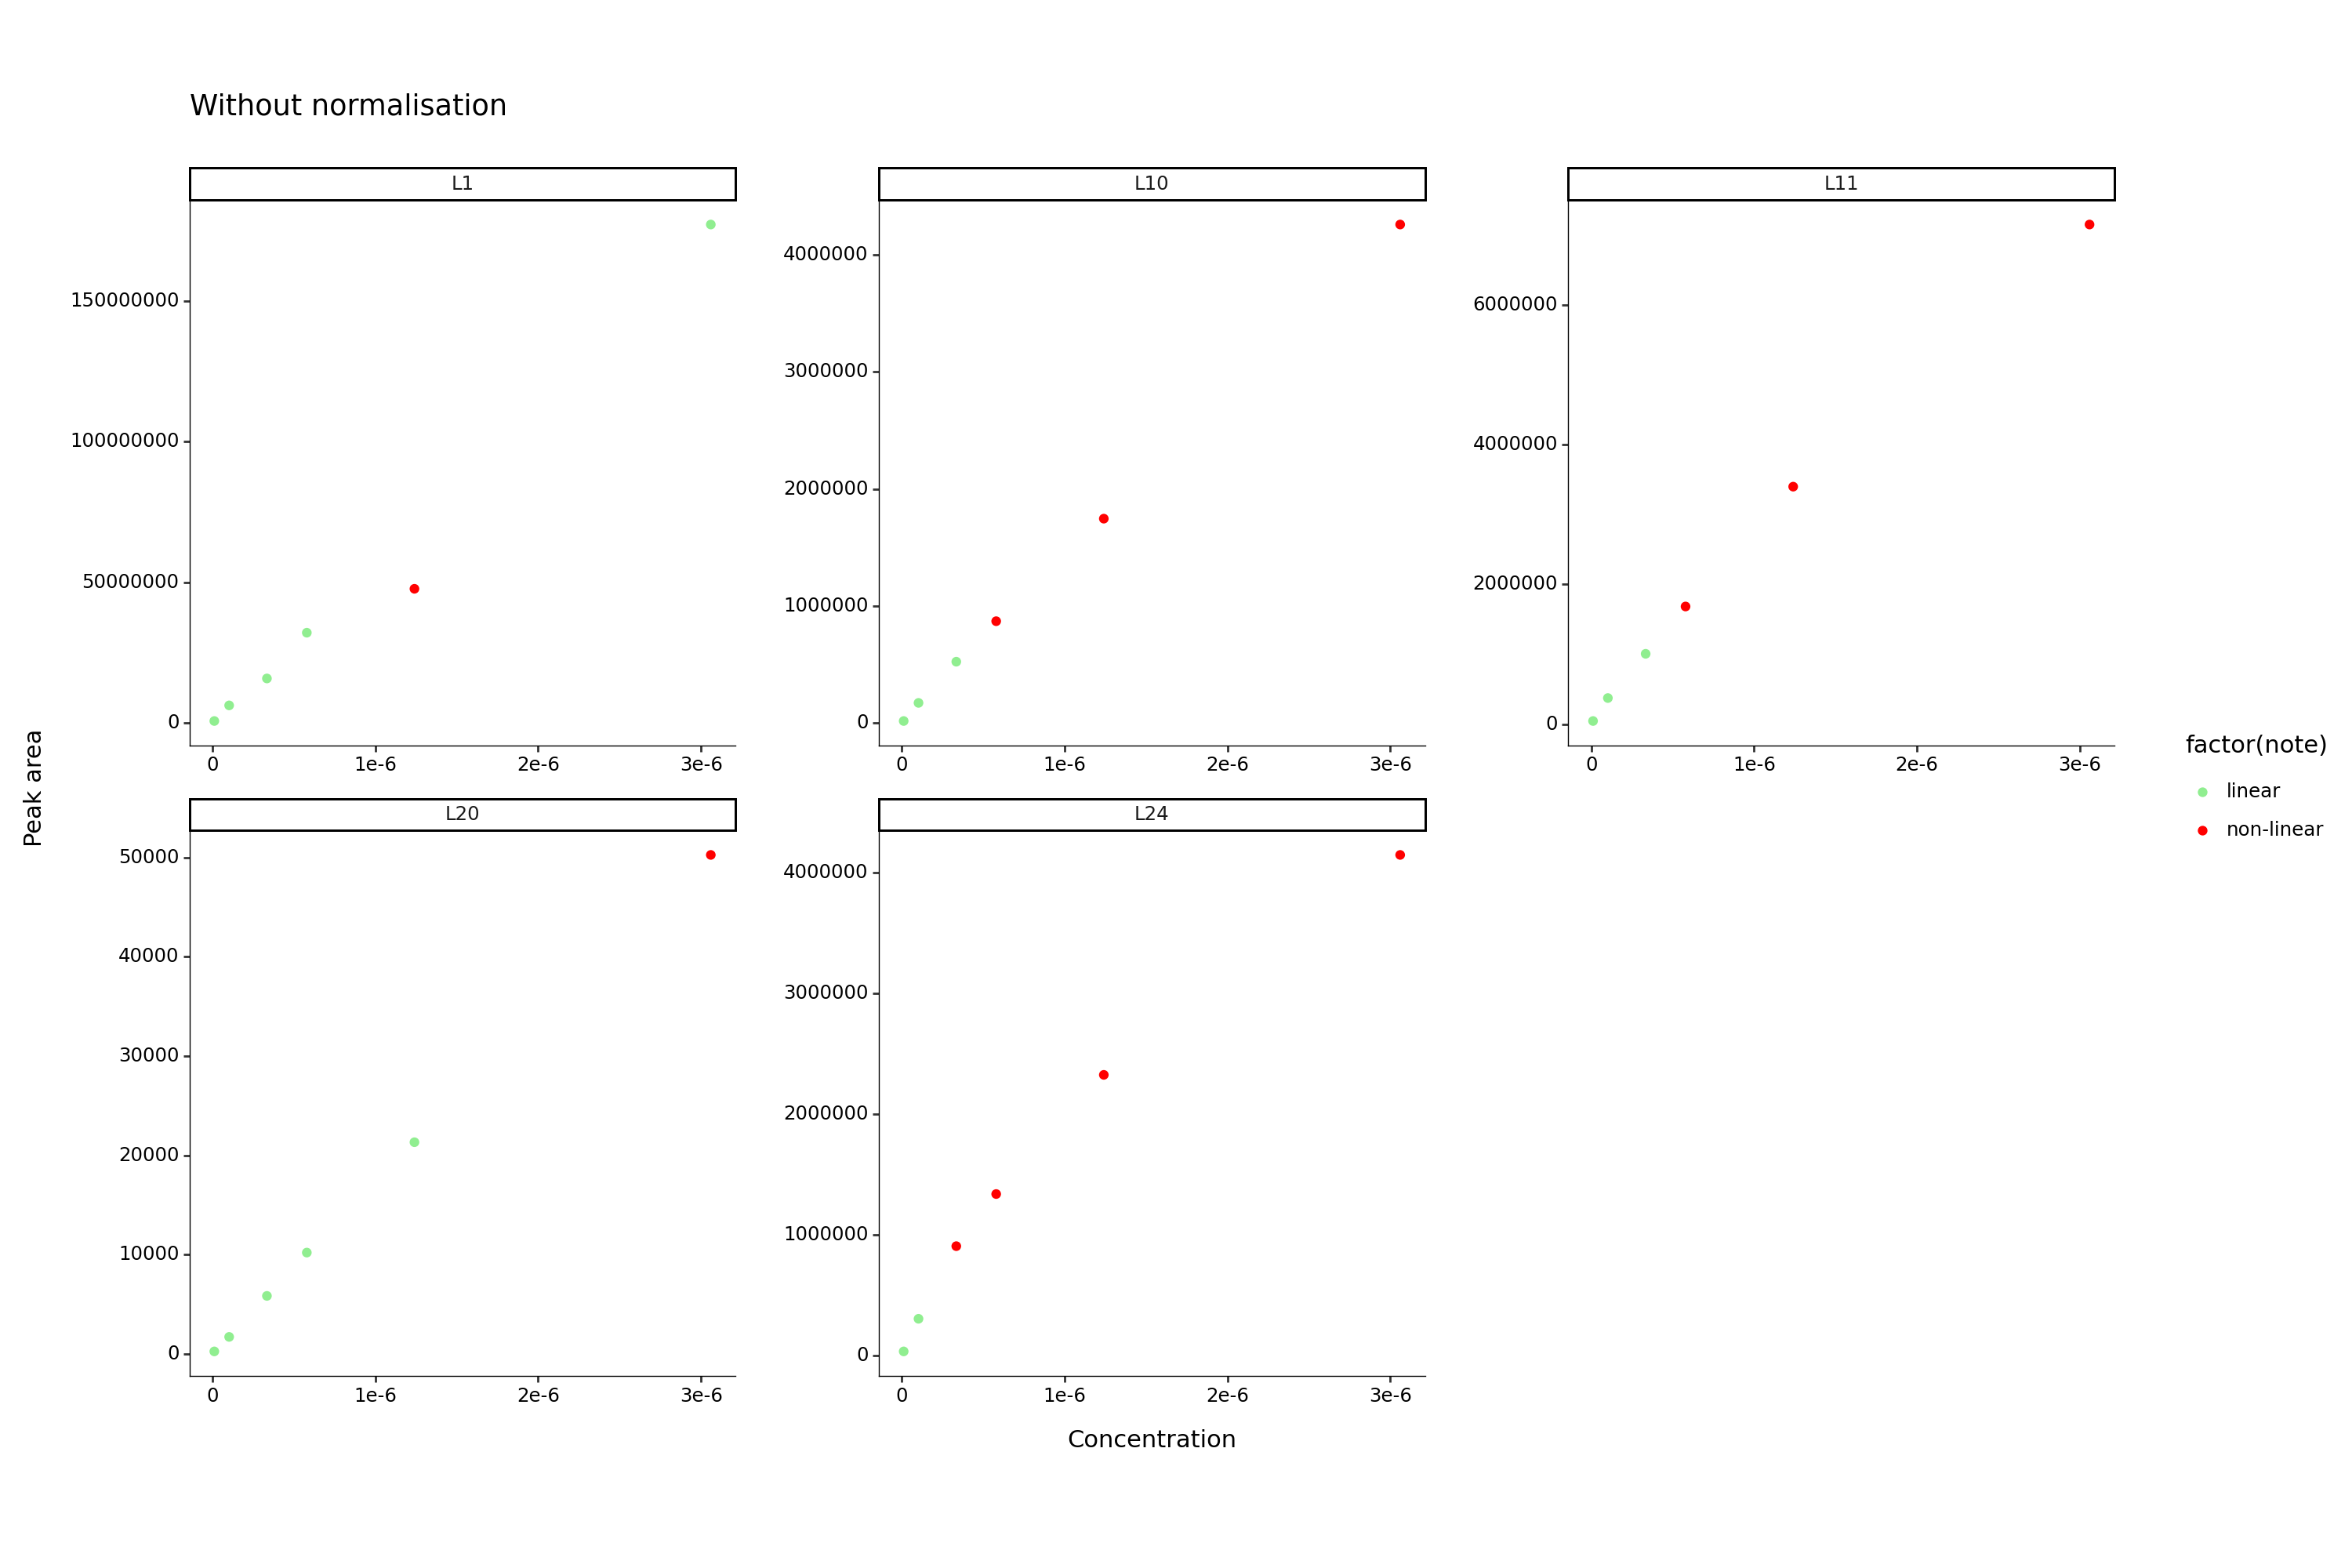

<Figure Size: (1500 x 1000)>

In [45]:
fig_org 

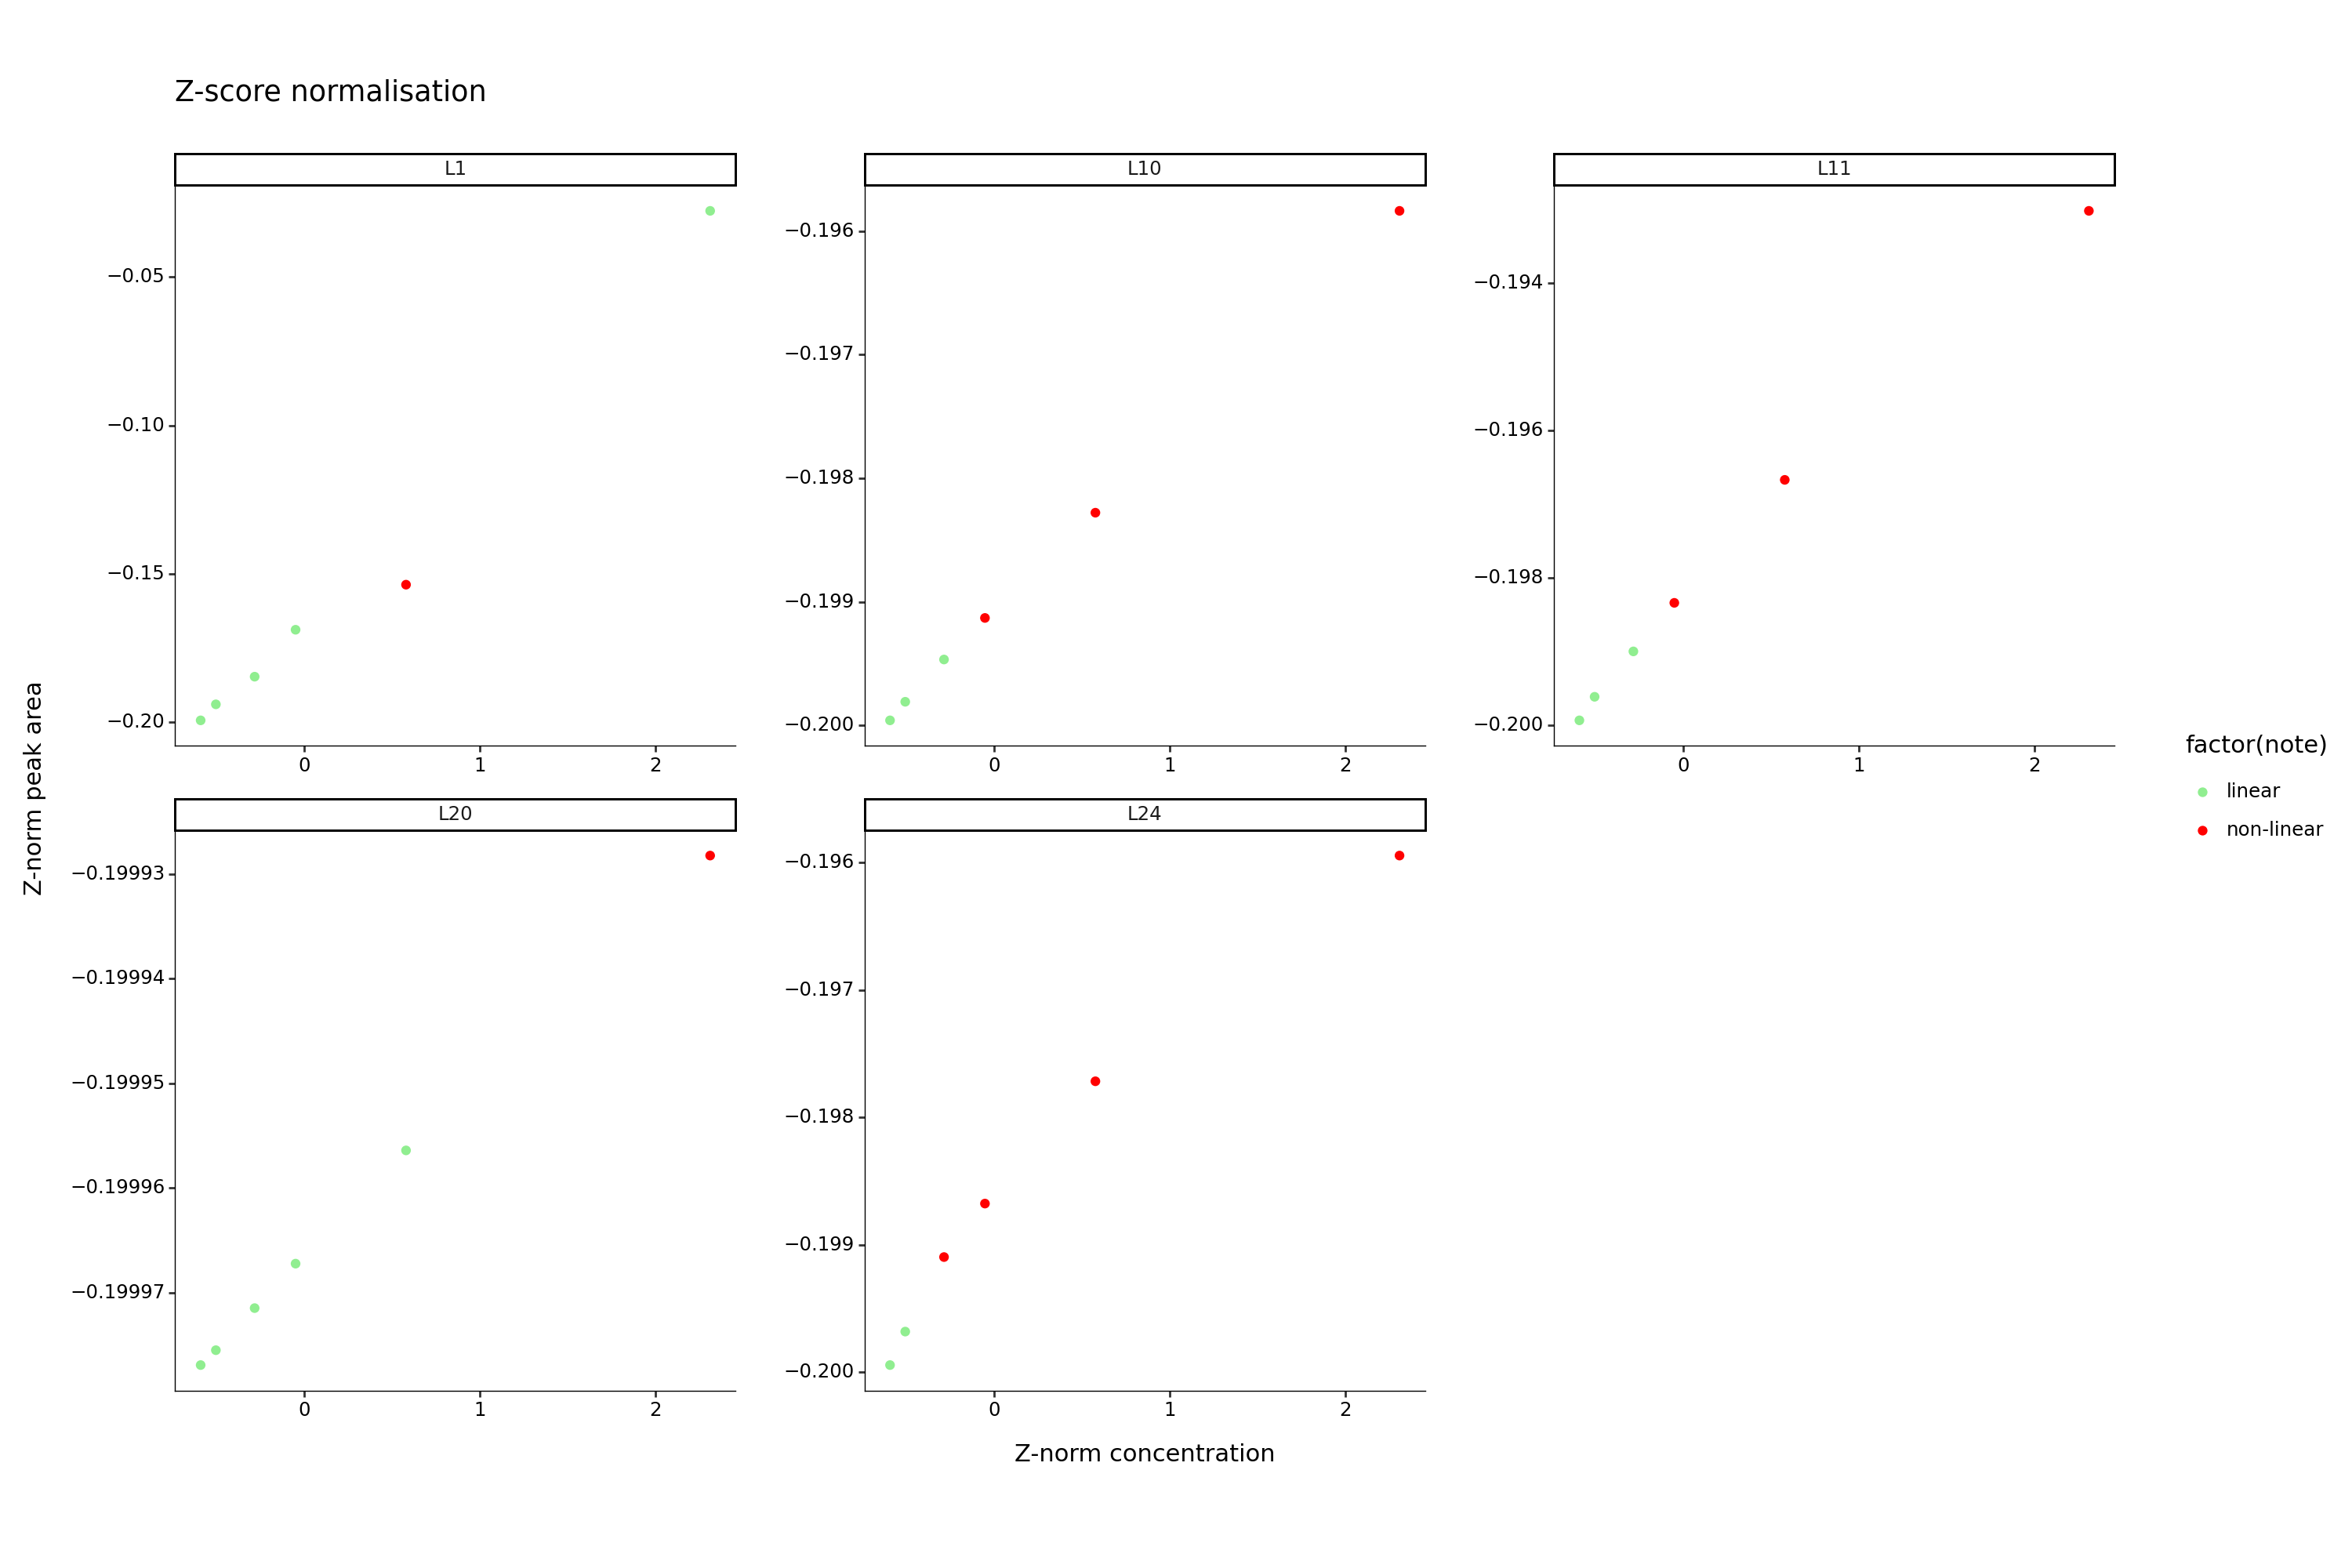

<Figure Size: (1500 x 1000)>

In [46]:
fig_Z_norm

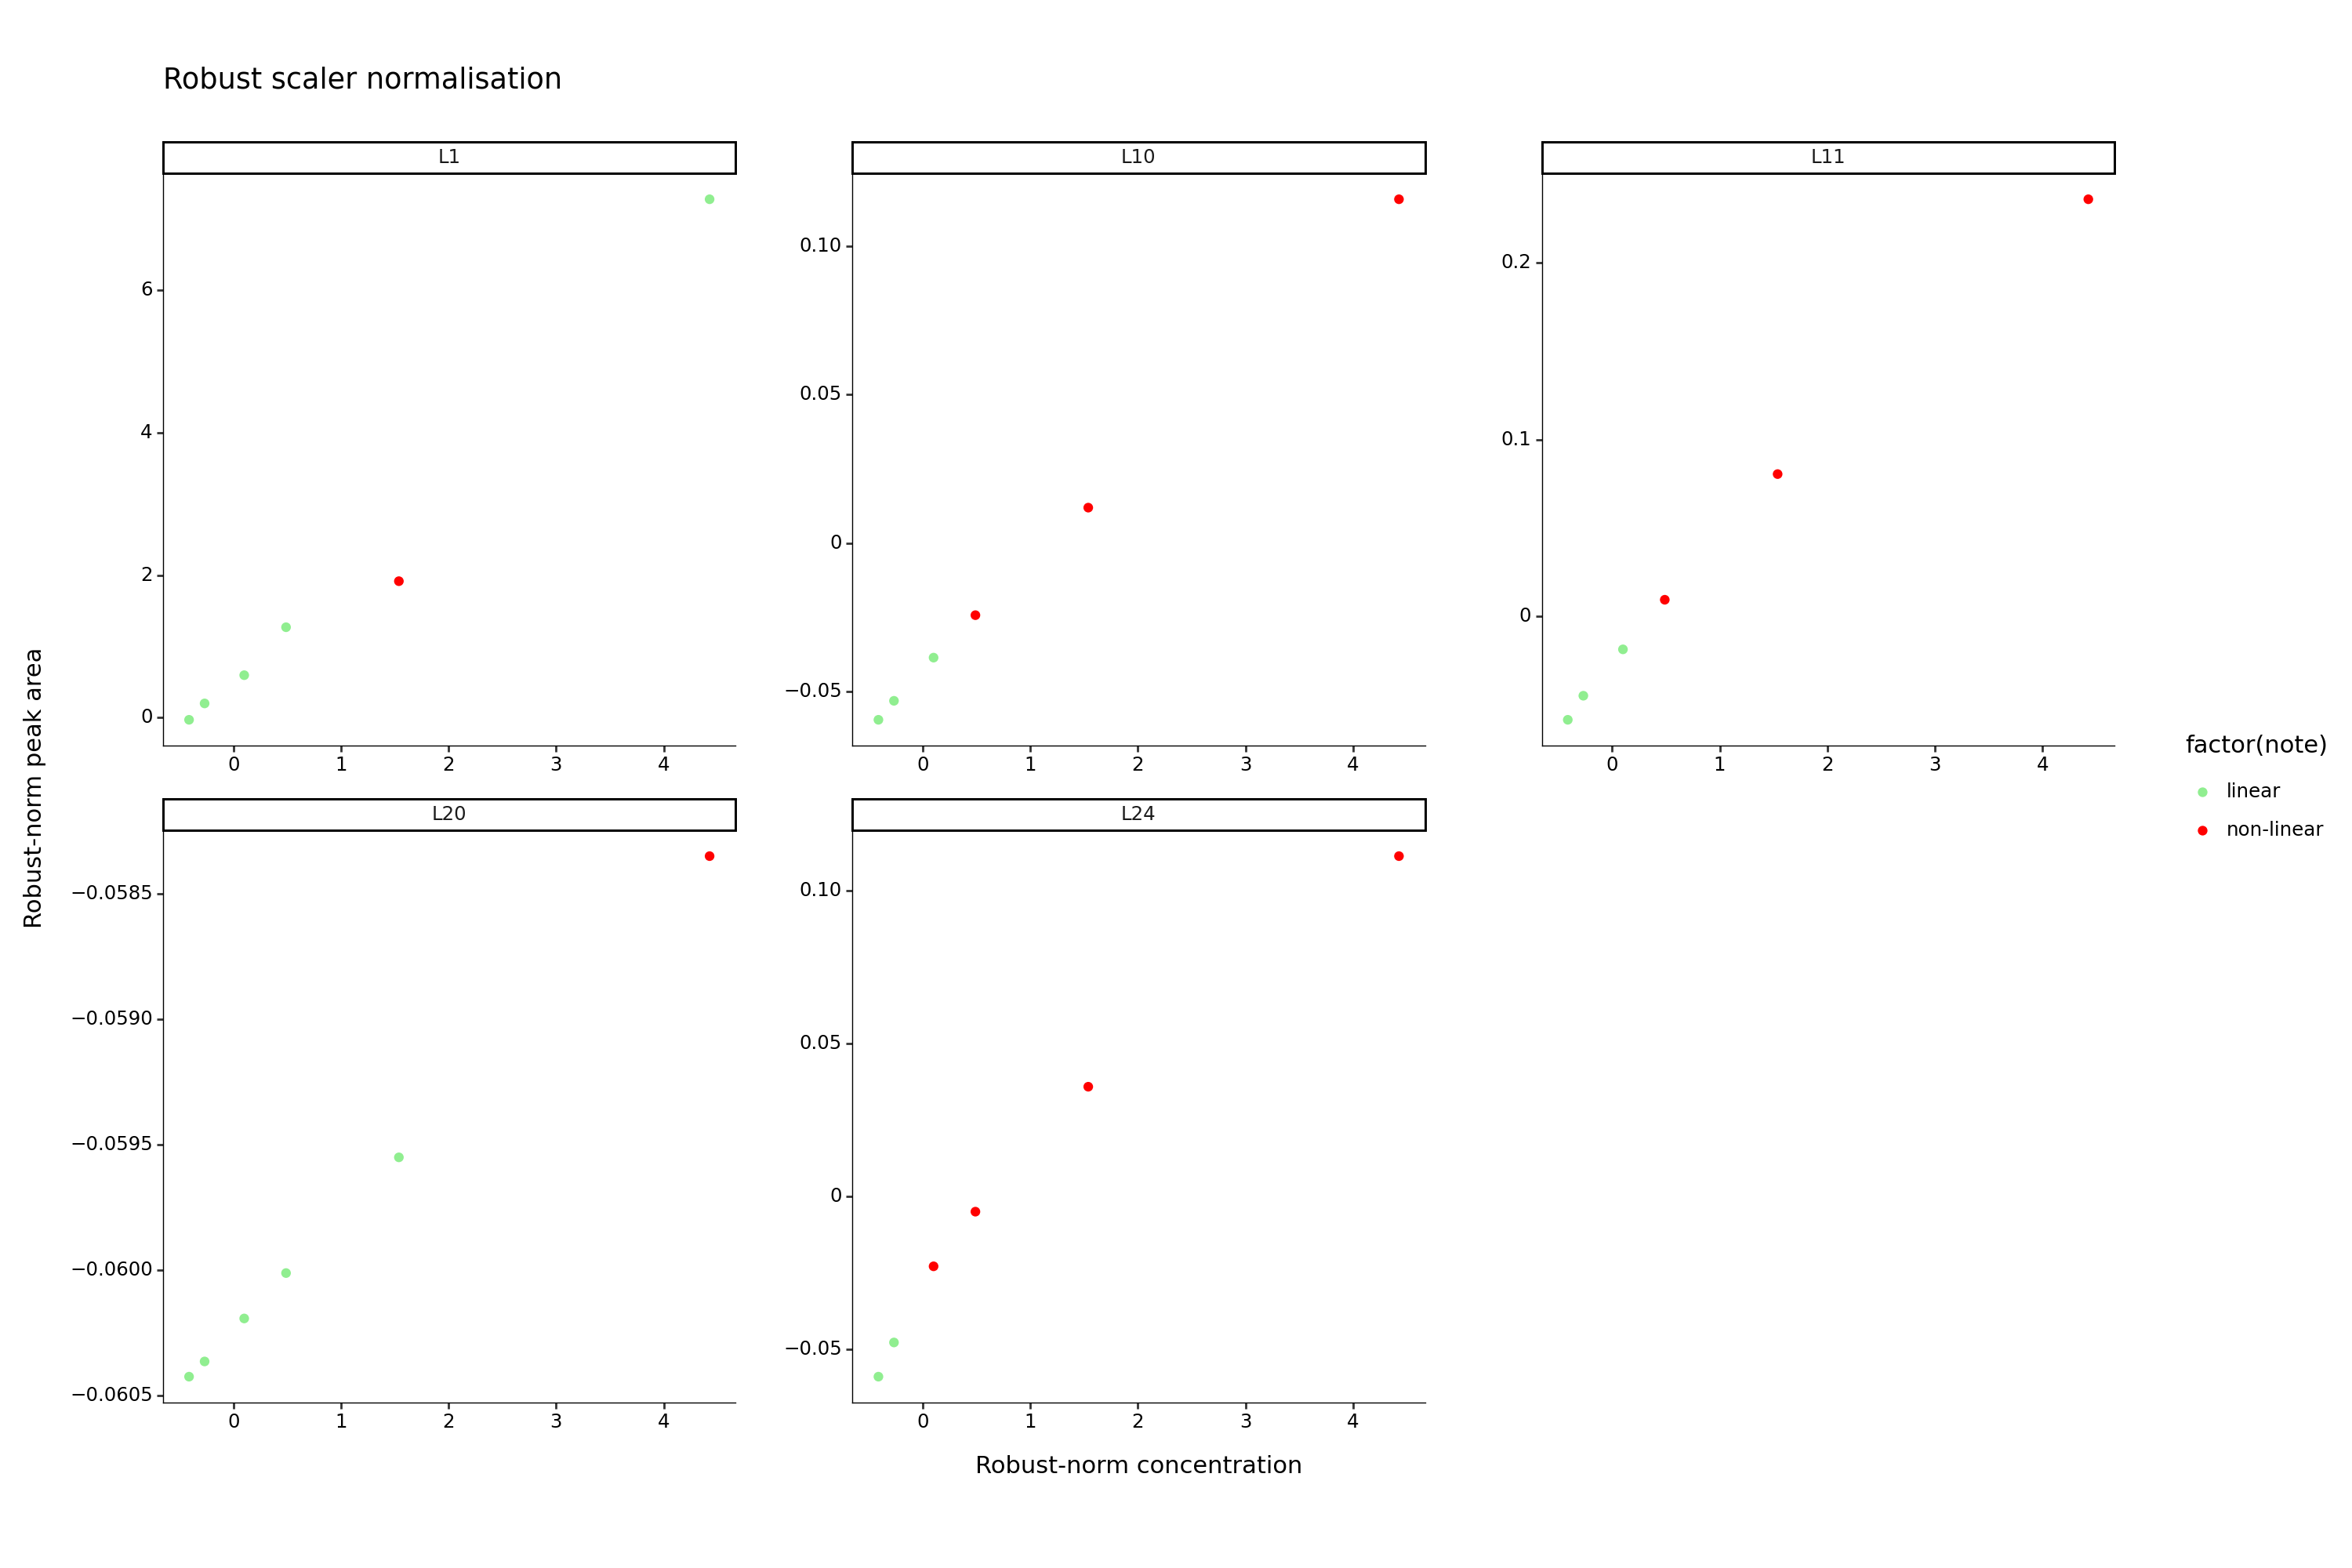

<Figure Size: (1500 x 1000)>

In [47]:
fig_robust_norm

I can't really see any difference between these three sets of graphs, but maybe it is better to use some normalisation of the data? But I do not know which method is better, here's the explanation of Z-score normalisation vs Robust scaler normalisation from ChatGPT 4: </br>
</br>
**Z-score Normalization (Standardization)**</br>
</br>
*Methodology:* </br>
- It involves rescaling the features so that they have the properties of a standard normal distribution with a mean (µ) of 0 and a standard deviation (σ) of 1.
- The formula is: (X − μ) / σ, where X is the feature value.
</br>
*When to Use:*</br>
- Ideal for data that follows a Gaussian (normal) distribution.
- Suitable for algorithms that assume data is normally distributed, like linear regression, logistic regression, and linear discriminant analysis.
</br>
*Pros:*</br>
- Simplifies learning and improves performance for models that assume data is normally distributed.
- Preserves useful information about outliers and makes the algorithm less sensitive to them.
</br>
*Cons:*</br>
- Not robust to outliers. Outliers can significantly affect the mean and standard deviation, leading to less effective normalization.</br>
</br>
**Robust Scaler Normalization**</br>
</br>
*Methodology:*</br>
- This technique uses the median and the interquartile range (IQR) for scaling, thus it's less sensitive to outliers.
- The formula is: (X − Median) / IQR, where IQR is the range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile).
</br>
*When to Use:*</br>
- Best suited for data with outliers or data not normally distributed.
- Useful for algorithms that require feature scaling but are sensitive to outliers.
</br>
*Pros:*</br>
- Robust to outliers, as it uses median and IQR which are not influenced by outliers.
- More suitable for real-world data where outliers are common.
</br>
*Cons:*</br>
- Might not perform well if the standard deviation is very small or if the feature does not follow a Gaussian distribution.
- The transformed features might not retain their interpretability.
</br></br>
**Summary**</br>
- Z-score Normalization is best for data that is normally distributed and for models that assume a normal distribution. Its drawback is its sensitivity to outliers.
- Robust Scaler Normalization is ideal for datasets with outliers and for non-normal distributions. It's more robust to outliers but might lose some interpretability of the data.
</br>
In practice, the choice between these two methods depends largely on the nature of your data and the requirements of the model you are using. It's often recommended to visualize your data first to understand its distribution and outlier characteristics before choosing a normalization technique.</br>
</br></br>
Based on this, I assume the Z-score normalisation would be most suitable?

In [53]:
# Calculate RFs (non-normalised data)
from sklearn.linear_model import LinearRegression

# First test with only one lab
cal_data_L1 = cal_data[cal_data['lab'] == 'L1']

# Function to calculate RF (slope of linear regression)
def calculate_rf(data):
    X = data['c_real_M'].values.reshape(-1, 1)
    y = data['peak_area'].values
    model = LinearRegression().fit(X, y)
    return model.coef_[0]  # Slope of the linear regression

# Function to iteratively remove points and calculate RF
def iterative_rf_calculation(data, remove_highest = True):
    rf_values = []
    while len(data) > 2:
        rf = calculate_rf(data)
        rf_values.append(rf)
        if remove_highest:
            data = data[:-1]  # Remove the highest concentration point
        else:
            data = data[1:]   # Remove the lowest concentration point
    return rf_values

# Apply the process to each compound
compound_rf_results = {}
for compound, group in cal_data_L1.groupby('compound'):
    # Sort each group by concentration
    sorted_group = group.sort_values(by='c_real_M')
    
    # Calculate RF by iteratively removing highest and lowest concentration points
    rf_from_high = iterative_rf_calculation(sorted_group.copy(), remove_highest=True)
    rf_from_low = iterative_rf_calculation(sorted_group.copy(), remove_highest=False)
    
    # Store the results in a dictionary
    compound_rf_results[compound] = {'rf_from_high': rf_from_high, 'rf_from_low': rf_from_low}

# compound_rf_results is a dictionary with compounds as keys and their RF values as values

# changing it to a dataframe
rows = []
for compound, rf_data in compound_rf_results.items():
    for iteration_type in ['rf_from_high', 'rf_from_low']:
        for step, rf_value in enumerate(rf_data[iteration_type]):
            rows.append({'compound': compound, 'iteration_type': iteration_type, 'points_removed': step+1, 'RF': rf_value})

# Convert to DataFrame
rf_results_df = pd.DataFrame(rows)

# Display the DataFrame
print(rf_results_df)


          compound iteration_type  points_removed            RF
0         Amitrole   rf_from_high               1  4.493062e+13
1         Amitrole   rf_from_high               2  3.978316e+13
2         Amitrole   rf_from_high               3  4.835929e+13
3         Amitrole   rf_from_high               4  4.788609e+13
4         Amitrole    rf_from_low               1  4.493062e+13
..             ...            ...             ...           ...
289  Vancomycin_H2   rf_from_high               2  9.280953e+12
290  Vancomycin_H2   rf_from_high               3  1.129702e+13
291  Vancomycin_H2    rf_from_low               1  1.710401e+13
292  Vancomycin_H2    rf_from_low               2  1.800056e+13
293  Vancomycin_H2    rf_from_low               3  1.917983e+13

[294 rows x 4 columns]


In [54]:
cal_data_L1.head()

,lab,compound,sample,peak_area,note,c_real_M,peak_area_Z_norm,c_real_Z_norm,peak_area_robust_norm,c_real_robust_norm
0,L1,Amitrole,cal1,2.856002e+08,non-linear,6.250000e-06,0.077633,5.346484,11.766050,9.490476
1,L1,Amitrole,cal2,1.030577e+08,non-linear,2.580000e-06,-0.099803,1.853444,4.207104,3.665079
2,L1,Amitrole,cal3,6.593301e+07,non-linear,1.340000e-06,-0.135889,0.673234,2.669801,1.696825
3,L1,Amitrole,cal4,3.805867e+07,non-linear,7.780000e-07,-0.162983,0.138333,1.515546,0.804762
4,L1,Amitrole,cal5,1.340538e+07,linear,2.350000e-07,-0.186947,-0.378485,0.494673,-0.057143


In [ ]:
# Calculate RFs (this time for Z-normalised data)

# Function to calculate RF (slope of linear regression)
def calculate_rf(data):
    X = data['c_real_Z_norm'].values.reshape(-1, 1)
    y = data['peak_area_Z_norm'].values
    model = LinearRegression().fit(X, y)
    return model.coef_[0]  # Slope of the linear regression

# Function to iteratively remove points and calculate RF
def iterative_rf_calculation(data, remove_highest = True):
    rf_values_norm = []
    while len(data) > 2:
        rf_norm = calculate_rf(data)
        rf_values_norm.append(rf_norm)
        if remove_highest:
            data = data[:-1]  # Remove the highest concentration point
        else:
            data = data[1:]   # Remove the lowest concentration point
    return rf_values_norm

# Apply the process to each compound
compound_rf_results_norm = {}
for compound, group in cal_data_L1.groupby('compound'):
    # Sort each group by concentration
    sorted_group = group.sort_values(by='c_real_Z_norm')
    
    # Calculate RF by iteratively removing highest and lowest concentration points
    rf_from_high_norm = iterative_rf_calculation(sorted_group.copy(), remove_highest=True)
    rf_from_low_norm = iterative_rf_calculation(sorted_group.copy(), remove_highest=False)
    
    # Store the results in a dictionary
    compound_rf_results_norm[compound] = {'rf_from_high': rf_from_high_norm, 'rf_from_low': rf_from_low_norm}

# compound_rf_results is a dictionary with compounds as keys and their RF values as values

# changing it to a dataframe
rows_norm = []
for compound, rf_data in compound_rf_results_norm.items():
    for iteration_type in ['rf_from_high', 'rf_from_low']:
        for step, rf_value in enumerate(rf_data[iteration_type]):
            rows_norm.append({'compound': compound, 'iteration_type': iteration_type, 'points_removed': step+1, 'RF': rf_value})

# Convert to DataFrame
rf_results_norm_df = pd.DataFrame(rows_norm)

# Display the DataFrame
print(rf_results_norm_df)